## 계층적 클러스터링

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [5]:
iris = pd.read_csv('./dataset/iris.csv')

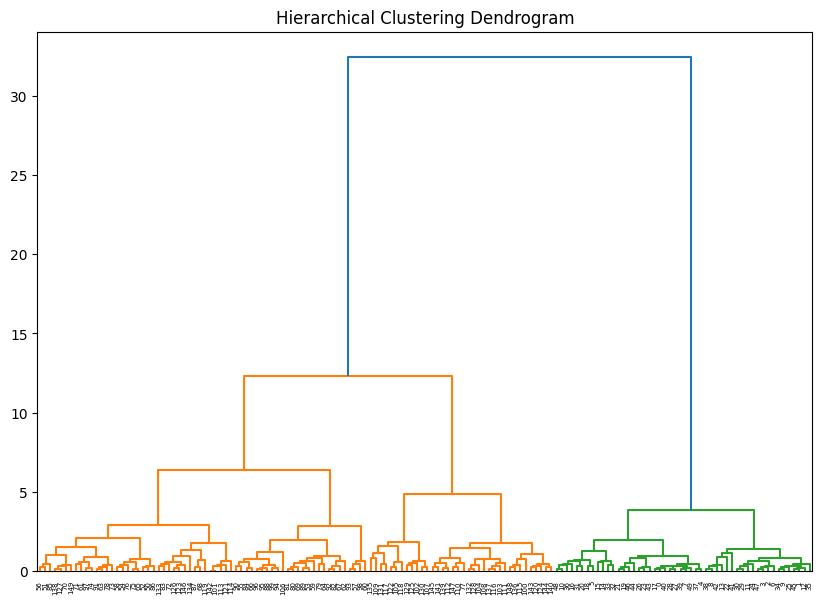

In [9]:
# 데이터 링크
linked = linkage(X, method='ward', metric='euclidean')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# # 클러스터 할당 결과 (클러스터 수: 3)
# iris['Cluster_hierarchical'] = fcluster(linked, 3, criterion='maxclust')
# print(iris['Cluster_hierarchical'].value_counts())
